<h6> <div align="left"> Date: le 06/04/2023 </div></h6>
    <H1><div align="center" style="color:#006400" > Projet de fouille  de données:   </div></H1>
    <H1> <div align="center" style="color:navy" >  Classifieur MLP:   MLPClassifier de Sklearn  </div> </H1>

  <h6> <div align="right">  réalisé par: Eya Besbes et Mayssa Hemdana </div></h6>
 

<h2 style="color:#006400" > Introduction:</h2>

Dans ce projet nous allons construire un classifieur MLP tout en utlisant le MLPClassifier de Sklearn respectivement sur les jeux de données digits et iris.
Nous avons choisi de traviller avec ces jeux de données, parce qu'ils ne requierent pas de pré-traitement.
En effet, ces jeux de données ne contiennnent qucune valeur manquante ou abbérantes ce qui nous facilitera la tâche de la réalisation de ce projet.
En Fait, le MLP est composé de 3 types de couches différents: une couche d'entrée, des couches cachées et finalement une couche de sortie comme le montre la figure ci-dessous. 
le MLP prend comme entrée le jeu de donnée. Par la suite, il va essayer de classer les données fournies en entrée tout en parcourant des couches cachées de réseau de neurones artificiels. En pratique, ces couches contienent des fonctions d'activation permettant de calculer le nouveau poids à chaque passage de'une couche à une autre.

![MLP-deep-learning-architecture.png](attachment:MLP-deep-learning-architecture.png)

<h2 style="color:navy"> I. Classifieur MLPClassifier en utilisant le dataset digits:</h2>


<h3 style="color:maroon"> 1. Phase d'apprentissage :</h3>

In [1]:
#step1:
#importation des bibliothèques
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score, ConfusionMatrixDisplay

In [2]:
# Step 2
# Loading the dataset
dataset = load_digits()

In [3]:
# Step 3
# Splitting the data into tst and train
# 80 - 20 Split
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.20, random_state=4)

In [4]:
# Step 4
# Making the Neural Network Classifier
NN = MLPClassifier(solver="sgd",early_stopping=True) #verbose=True
#Verbose prend soit la valeur True ou False: 
#si verbose == True ==> il y aura un affichage de toutes les itérations ainsi que le paramètre loss 
#sinon ==> aucun affichage des itérations 


In [5]:
# Step 5
# Training the model on the training data and labels
# nous avons utilisé la fonction catch_warning car ce modèle ne converge pas
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    NN.fit(x_train, y_train)


<h2 style='color:maroon'> 2. Prédiction </h2>

Dans cette phase nous allons tester le modèle tout en faisant une prédiction de y_pred à partir des données x_test.

In [6]:
# Step 6
# prediction: on va prédire y_pred à partir des données x_test
y_pred = NN.predict(x_test)

<h2 style='color:maroon'>3. Phase de Test et d'évaluation: </h2>

Les résultats  obtenus vont êtres analysés et exploités. En effet, nous  allons calculer le degré de précision, de justesse, le rappel ainsi que la matrice de confusion pour évaluer le modèle que nous avons utilisé. De même nous allons faire recours aux attributs associés au MLPClassifier tel que loss_curv,best_validation_score_, coefs_, intercept_, etc, non seulement pour évaluer le modèle mais aussi pour extraire les poids et les biais  utilisés dans l'apprentissage.

<h3 style="color:#006400" > 3.1 Affichage du score de l'apprentissage et de test </h3>

In [7]:
# step 7:
# affichage du degré de précision de l'apprentissage
# affichage du degré de précision du test
train_score=NN.score(x_train, y_train)*100
test_score=NN.score(x_test,y_test)*100
print("Training set score: ", train_score  )
print("Test set score: " ,test_score)

Training set score:  97.21642310368824
Test set score:  95.83333333333334


<h3 style="color:#006400" > 3.2  Affichage des poids et des biais utilisés pour l'apprentissage </h3>
<h4> 3.2.A Affichage des poids : </h4>

In [8]:
#on va afficher les poids utilisés entre la première couche cachée et la deuxième couchée du réseau de neurones
print("weights between first and second hidden layer:")
print(NN.coefs_[1])

weights between first and second hidden layer:
[[-2.28676311e-01  1.37240023e-01 -1.99564161e-01 -1.27348910e-01
   1.55349657e-01  1.13629423e-03  7.81965210e-02 -2.04058011e-01
  -1.18259524e-01  7.47225362e-02]
 [ 1.14857716e-01 -1.89736561e-01  1.05359075e-01 -8.94136104e-02
  -5.58545422e-02 -2.13039148e-01  6.73772183e-02 -2.00758299e-02
   1.49810437e-01  1.00817727e-01]
 [ 4.87798557e-02 -6.85782883e-02  4.12978671e-02 -2.31891522e-01
  -1.22411269e-01  1.78748872e-01  2.21361086e-01  8.69975499e-02
   1.39766643e-01 -2.86100306e-02]
 [-1.28647074e-01  1.86844688e-01  7.07938996e-02 -1.14481849e-01
  -2.69945836e-02 -8.22100543e-02  1.42793276e-01 -4.69265583e-02
   1.25933524e-01 -1.36523140e-01]
 [-1.56073107e-01 -8.14242572e-02 -1.23095230e-01  1.37614161e-01
   3.11768181e-02 -9.50808238e-02  7.11562719e-02 -9.83385176e-02
  -1.63182740e-02 -1.82639136e-02]
 [-1.25808181e-01 -1.07345152e-01 -2.08386007e-01 -1.46842816e-01
  -2.05875853e-01  1.09964792e-01 -2.41389338e-01  7

In [9]:
# affichage du poids w0
print("w0 = ", NN.coefs_[0][0][0])

w0 =  -0.15906602360817848


<h4>3.2.B Affichage des biais </h4>

In [10]:
# Dans cette section nous afficherons le bias de la première couche cachée du réseau de neurones
print("the biais in the first hidden layer: ")
print("\n ", NN.intercepts_[0])

the biais in the first hidden layer: 

  [ 0.0100581  -0.11208109  0.06143047  0.05473764  0.11101128 -0.09941953
  0.00991248 -0.1554216  -0.00451926  0.16860735 -0.16730438 -0.17603725
  0.11260028 -0.13397353  0.07236384 -0.12371363  0.13673953  0.17855203
  0.03077669  0.12339221 -0.06148542  0.03194361  0.11468535 -0.14700051
  0.07283222 -0.04501696  0.10793539  0.0434225   0.15237459 -0.04431162
 -0.15459382  0.01740194 -0.1118651   0.0957445   0.06081739  0.07473969
 -0.11314724  0.09078249 -0.00894682  0.03939342  0.03934127 -0.06908966
 -0.13760341 -0.10565661 -0.02578458 -0.08119208  0.07533818  0.12179977
  0.18624855  0.03700673  0.03212174 -0.03032948 -0.08665762  0.06703531
  0.01860358  0.11942864  0.16459234  0.11645188  0.17239804  0.00187803
 -0.16322966 -0.08439431  0.13499514 -0.16517283  0.02071678  0.00724364
  0.1317454  -0.04565639  0.12850222  0.1564904   0.1663756   0.06923012
 -0.14818974 -0.04829336  0.00852354  0.18218029  0.02518271  0.18826156
  0.014218

<h3 style="color:#006400" > 3.3 Affichage du meilleur score  obtenu pendant l'apprentissage: </h3>

In [11]:
#Affichage du meilleur score
best_score=NN.best_validation_score_
best_score

0.9444444444444444

<h3 style="color:#006400" > 3.4   Calcul de la précision, de la justesse, du rappel ainsi que la matrice de confusion: </h3>

In [12]:
# Evaluating the results of the model
# Pour ce faire nous allons calculer le degré de précision, la justesse, le rappel ( recall) ainsi que la matrice de confusion
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
recall=recall_score(y_true=y_test,y_pred=y_pred, average='weighted')*100
precision= precision_score(y_test,y_pred,average='weighted')*100

In [13]:
# affichage des résultats calculés dans l'étape 7:
print("Accuracy for Neural Network is:",accuracy)
print("the recall for Neural Network is", recall)
print("the precision for this Neural Network is ", precision)
print("Confusion Matrix",confusion_mat)


Accuracy for Neural Network is: 95.83333333333334
the recall for Neural Network is 95.83333333333334
the precision for this Neural Network is  96.12884865297144
Confusion Matrix [[36  0  0  0  0  1  1  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  2 39  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  2]
 [ 0  3  0  0  0  0  1  0 29  0]
 [ 0  1  0  0  1  0  0  0  0 33]]


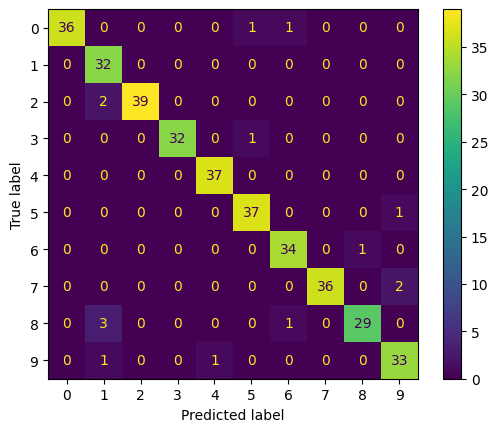

In [14]:
# 2 ème méthode pour afficher une matrice de confusion:
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()

<h3 style="color:#006400" > 3.5 Affichage de la courbe loss_curve: </h3>



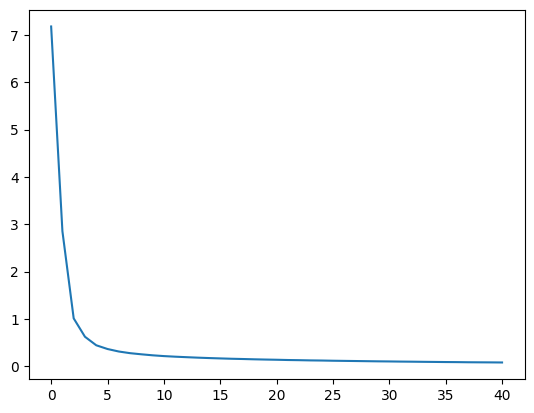

In [15]:
#Affichage de la courbe loss_curve
import matplotlib.pyplot as plt
loss_values = NN.loss_curve_
plt.plot(loss_values)


<h3 style="color:#006400" > 3.6  La courbe learning_curve : </h3>

In [16]:
!pip3 install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


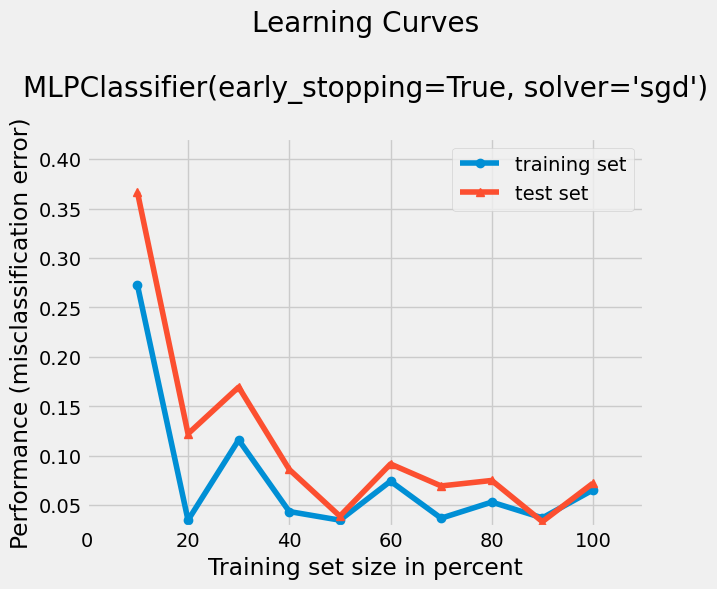

In [17]:
# Ce code permet de nous afficher l'évolution de l'erreur de classification dans le train set et le test set
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    plot_learning_curves(x_train, y_train, x_test, y_test, NN)
plt.show()

<h3 style="color:#006400" >3.7 Courbe de validation des scores</h3>

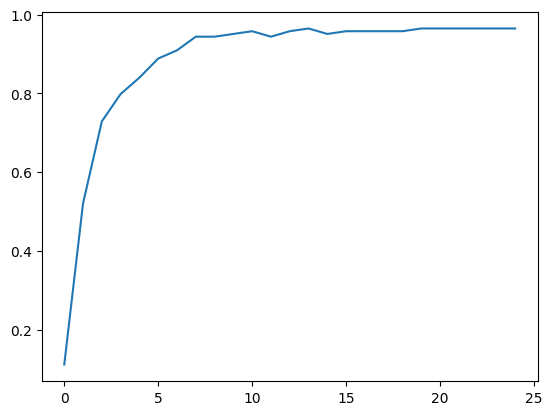

In [18]:
valid=NN.validation_scores_
plt.plot(valid)

<h3 style="color:#006400"> 3.8  Le rapport de classification </h3>

In [19]:
# Rapport de classification 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.84      1.00      0.91        32
           2       1.00      0.95      0.97        41
           3       1.00      0.97      0.98        33
           4       0.97      1.00      0.99        37
           5       0.95      0.97      0.96        38
           6       0.94      0.97      0.96        35
           7       1.00      0.95      0.97        38
           8       0.97      0.88      0.92        33
           9       0.92      0.94      0.93        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



<h3 style="color:#006400"> 3.9 l'erreur de classification </h3>

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.9305555555555556

<h2 style="color:maroon"> 4. Optimisation de MLPClassifier en utilisant GridSearch: </h2>
<h3 style="color:#006400"> 4.1 Apprentissage: </h3>

In [21]:
# Nous avons utilisé GridSearch avec MLPClassifier afin de l'optimiser 
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
NN1=GridSearchCV( MLPClassifier(solver="sgd"),param_grid, cv=3, scoring='accuracy')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    NN1.fit(x_train, y_train)

<h3 style="color:#006400"> 4.2 Test et évaluation</h3>

In [22]:
print("Best parameters set found on development set:")

print(NN1.best_params_)

Best parameters set found on development set:
{'alpha': 1e-05, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.003}


In [23]:
print("Grid scores on development set:")
print()
means = NN1.cv_results_['mean_test_score']
stds = NN1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, NN1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Grid scores on development set:

0.239 (+/-0.241) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.207 (+/-0.152) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.152 (+/-0.134) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.104 (+/-0.000) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.850 (+/-0.210) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.589 (+/-0.480) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.301 (+/-0.331) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.104 (+/-0.000) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
0.940 (+/-0.020) for {'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.003}
0.923 (+/-0.010) for {'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}
0.604 (+/-0.477) for

In [24]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, NN1.predict(x_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.91      0.94      0.92        32
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       1.00      0.97      0.99        37
           5       0.97      1.00      0.99        38
           6       1.00      0.97      0.99        35
           7       1.00      1.00      1.00        38
           8       0.91      0.94      0.93        33
           9       1.00      1.00      1.00        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




In [25]:
from sklearn.model_selection import validation_curve
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
X, y = dataset.data, dataset.target

param_range = np.arange(1, 250, 2)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    train_scores, test_scores = validation_curve(MLPClassifier(learning_rate='adaptive'), X, y, param_name="learning_rate_init", param_range=param_range,cv=4, scoring="accuracy", n_jobs=-1)

In [26]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

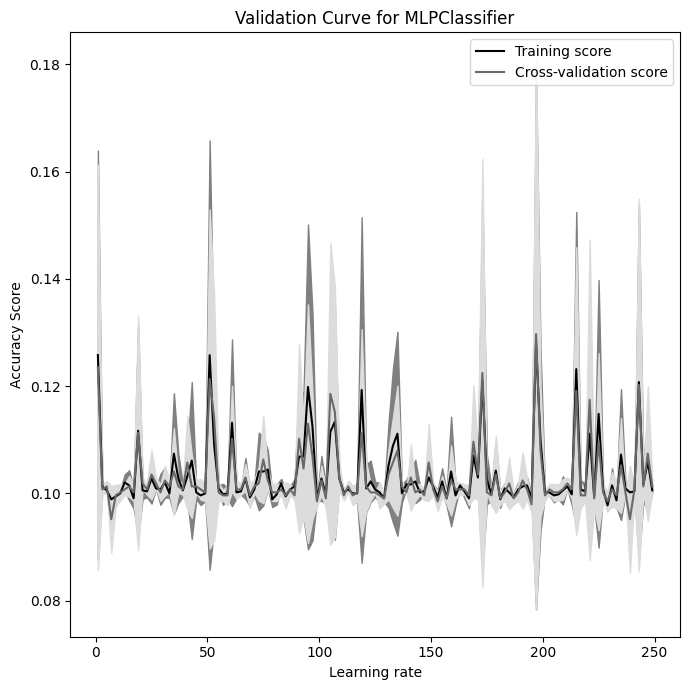

In [27]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve for MLPClassifier")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()
#Remarque:
# la courbe de validation permet de déterminer l'evolution du degré de précision d'un certain paramètre d'un estimateur pendant chaque itération.
# Dans ce cas, on va étudier le degré de précision du learning_rate_init tout en utlisant le modèle MLPCLassifier et le solveur descente de gradient stochastique sgd
# le learning_rate est initialisé à adaptive. Autrement dit le learning_rate_init va être recalculé dans chaque itérations afin d'avoir une erreur minimale.
# Le Learning_rate est par defaut constant

 <h2 style='color:navy'> II. Classifieur MLPClassifier en utilisant le dataset Iris:  </h2>
 <h3 style="color:maroon">1.  Phase d'apprentissage:</h3>

In [28]:
#importation des bibliothèques nécessaires
from sklearn.datasets import load_iris


In [29]:
# Load the Iris dataset
data = load_iris()

In [30]:
# Split the data into training and test sets
X_train, X_test,y_train, y_test = train_test_split(data.data, data.target,test_size=0.2)

In [31]:
# Define the model with mini-batch gradient descent
model = MLPClassifier(solver='sgd', batch_size=64, learning_rate_init=0.05,max_iter=15, verbose=True, early_stopping=True)

In [32]:
# Train the model on the training data
model.fit(X_train, y_train)

Iteration 1, loss = 1.31643686
Validation score: 0.583333
Iteration 2, loss = 0.93134055
Validation score: 0.583333
Iteration 3, loss = 0.74608050
Validation score: 0.583333
Iteration 4, loss = 0.53672270
Validation score: 0.583333
Iteration 5, loss = 0.46612594
Validation score: 0.666667
Iteration 6, loss = 0.36883999
Validation score: 0.750000
Iteration 7, loss = 0.29512327
Validation score: 1.000000
Iteration 8, loss = 0.26930596
Validation score: 0.750000
Iteration 9, loss = 0.28454486
Validation score: 0.750000
Iteration 10, loss = 0.37605140
Validation score: 0.583333
Iteration 11, loss = 0.56431419
Validation score: 1.000000
Iteration 12, loss = 0.24088102
Validation score: 1.000000
Iteration 13, loss = 0.21069715
Validation score: 0.750000
Iteration 14, loss = 0.35881310
Validation score: 0.750000
Iteration 15, loss = 0.21313075
Validation score: 1.000000


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, early_stopping=True, learning_rate_init=0.05,
              max_iter=15, solver='sgd', verbose=True)

<h3 style="color:maroon">2. Prédiction: </h3>

In [33]:
y_pred1=model.predict(X_test)

<h3 style="color:maroon"> 3. Test et évaluation du modèle : </h3>

In [34]:
# Evaluate the model on the test data
score = model.score(X_test, y_test)*100
print(score)

93.33333333333333


In [36]:
train_score=model.score(X_train, y_train)*100
test_score=model.score(X_test,y_test)*100
print("Training set score:",train_score)
print("Test set score:",test_score)

Training set score: 97.5
Test set score: 93.33333333333333


In [35]:
accuracy1 = accuracy_score(y_test,y_pred1)*100
confusion_mat1 = confusion_matrix(y_test,y_pred1)
recall1=recall_score(y_true=y_test,y_pred=y_pred1, average='weighted')*100
precision1= precision_score(y_test,y_pred1,average='weighted')*100

In [37]:
print("la justesse est :", accuracy1)
print("la matrice de confusion:", confusion_mat1)
print("le rappel/ recall est: ", recall1)
print("la décision est :", precision1)

la justesse est : 93.33333333333333
la matrice de confusion: [[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
le rappel/ recall est:  93.33333333333333
la décision est : 94.35897435897435


Text(0.5, 1.0, 'la matrice de confusion ')

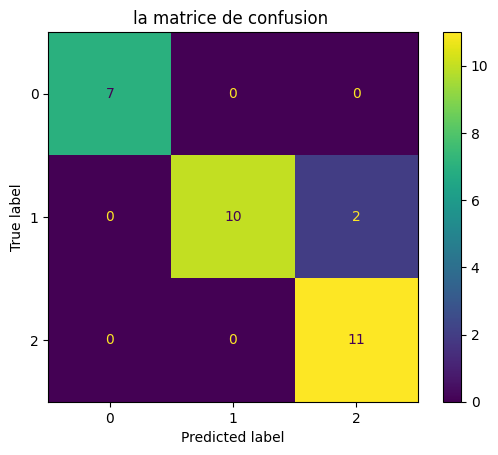

In [38]:
# Affichage de la matrice de confusion:
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_mat1)
disp1.plot()
plt.title("la matrice de confusion ")

In [39]:
print("weights between input and first hidden layer:")
print(model.coefs_[0])

weights between input and first hidden layer:
[[ 2.51478284e-01  4.62921393e-02  3.01672483e-01  2.46926694e-01
  -1.95793896e-01  2.18164204e-01 -5.58716486e-02 -3.15608597e-01
   1.56838472e-01 -9.70447291e-02  7.64742180e-02  1.18530796e-01
  -6.31022761e-02 -2.51476932e-01  7.80661721e-02 -3.54729924e-02
   1.09004749e-01  3.26529938e-02  1.42945661e-01 -2.01400347e-01
  -7.51678618e-04 -1.24435831e-02 -3.22555486e-01 -5.91314200e-02
   9.53834546e-02 -1.42257060e-02  1.05907828e-01 -1.20393609e-01
  -1.47948114e-01 -4.62247941e-02  1.70395534e-01  3.84097767e-02
  -1.28427601e-01  1.61248870e-02 -9.64554290e-02 -1.96982546e-01
  -1.61752499e-01  3.37114678e-01  3.62140950e-03 -7.96053545e-02
   1.97439385e-01  7.85346581e-02 -5.96053383e-02  1.00607811e-01
  -5.03304801e-03 -3.62966548e-02 -2.12803174e-01 -2.15906744e-01
  -2.45629509e-02  3.94245392e-02 -1.15580649e-01 -9.41366841e-03
   9.29838904e-02 -8.53488175e-02 -1.44779646e-01  1.28903016e-02
  -1.80807758e-01  1.51330419e

In [40]:
print("weights between first and second hidden layer:")
print(model.coefs_[1])

weights between first and second hidden layer:
[[ 4.40906680e-01 -1.00525278e-01  2.04993176e-02]
 [-2.36130540e-01 -8.65769991e-02 -1.80140452e-02]
 [ 3.56276057e-01 -1.15486729e-01 -3.11965724e-01]
 [ 1.97968645e-01 -2.15381721e-02 -2.22346224e-01]
 [-6.03525707e-02  2.25267534e-01  2.07346966e-01]
 [-8.83559656e-02  1.81384802e-01 -7.07024549e-02]
 [ 5.36784221e-02  1.37710294e-01  2.68027770e-01]
 [ 8.91074026e-02  8.61517184e-02 -1.54462679e-01]
 [ 1.43176036e-01  2.77377097e-03 -3.03737120e-01]
 [ 4.29862723e-02  3.59705987e-02  1.22778266e-01]
 [ 2.60363152e-01 -2.57864276e-01 -1.65153027e-01]
 [-3.04905580e-02  9.12674165e-02 -1.64459100e-01]
 [-1.13129651e-01 -3.36167313e-02 -9.75402796e-02]
 [ 7.32387843e-02  1.50645759e-01 -5.00334495e-02]
 [ 3.11895933e-01  6.03022103e-02  7.72226855e-02]
 [-1.81685390e-01 -6.26432111e-02  8.38754950e-02]
 [-1.03383155e-01 -1.07670504e-03 -1.10107322e-02]
 [ 1.55997242e-01  9.11981486e-02  1.21777408e-01]
 [-1.40396898e-01  1.39219731e-01  

In [41]:
print("w0 = ", model.coefs_[0][0][0])

w0 =  0.25147828408823886


In [42]:
print("biais in the first hidden layer:")
print(model.intercepts_[0])

biais in the first hidden layer:
[ 2.11538782e-01 -1.58483324e-01  2.87429395e-02 -1.15223083e-01
 -4.53586754e-02  2.39622487e-01 -3.06990882e-03  3.68586758e-02
  9.45903956e-02 -2.41316078e-01 -9.39221235e-02 -1.25204028e-01
 -3.41600015e-02  1.25032895e-01 -6.34129118e-02  1.44837416e-01
 -1.58143656e-05 -1.05305701e-01 -2.11740928e-01 -1.63279776e-01
 -2.50510817e-01 -1.87869521e-01  9.68675245e-02 -1.46040138e-01
  1.00023479e-01  2.09211887e-02 -2.18142679e-03 -1.18381150e-01
  1.01110886e-01  1.08604272e-01  1.89951156e-01  2.12231126e-01
  1.55184627e-01 -2.24082726e-02 -2.08209646e-01  1.19117965e-01
 -1.04329410e-01  1.22461432e-02 -1.67238142e-01 -1.59897945e-01
 -1.82642818e-01  1.27118044e-02 -5.69022999e-02 -5.35666666e-02
  1.42390041e-01 -2.11563651e-01  1.07521156e-01 -8.66579336e-02
  1.36074075e-01  3.22897893e-03 -1.83709881e-01  1.80318914e-01
  1.33478328e-01  1.55160694e-01 -1.63001612e-01 -1.20860154e-01
  1.39782508e-01 -1.73001757e-01  1.87015240e-01 -1.48066

In [43]:
print("biais in the second hidden layer:")
print(model.intercepts_[1])

biais in the second hidden layer:
[0.30613922 0.08150446 0.03306865]


In [44]:
#Affichage du meilleur score
best_score1=model.best_validation_score_
print(best_score1)

1.0


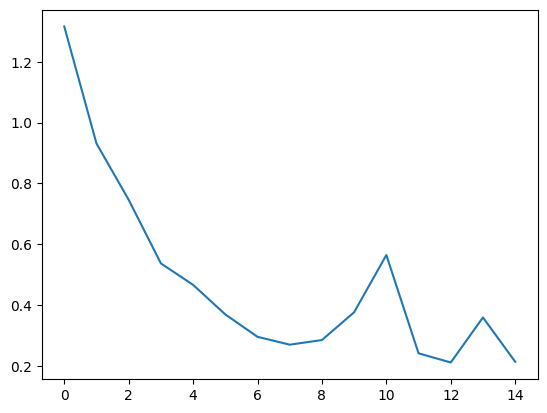

In [45]:
# traçage de la courbe loss curve:
loss_values1 =model.loss_curve_
plt.plot(loss_values1)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sampl

Iteration 1, loss = 1.86099271
Validation score: 0.500000
Iteration 2, loss = 1.77442335
Validation score: 0.000000
Iteration 3, loss = 1.20341161
Validation score: 1.000000
Iteration 4, loss = 0.65829177
Validation score: 0.500000
Iteration 5, loss = 0.68806288
Validation score: 1.000000
Iteration 6, loss = 0.56967154
Validation score: 0.500000
Iteration 7, loss = 0.47303146
Validation score: 1.000000
Iteration 8, loss = 0.41143610
Validation score: 0.500000
Iteration 9, loss = 0.37417071
Validation score: 1.000000
Iteration 10, loss = 0.34763701
Validation score: 0.500000
Iteration 11, loss = 0.33230465
Validation score: 1.000000
Iteration 12, loss = 0.34637395
Validation score: 0.500000
Iteration 13, loss = 0.36161187
Validation score: 1.000000
Iteration 14, loss = 0.40635929
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.69720603
Validation score: 0.666667
Iteration 2, loss = 1.19864971
V

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


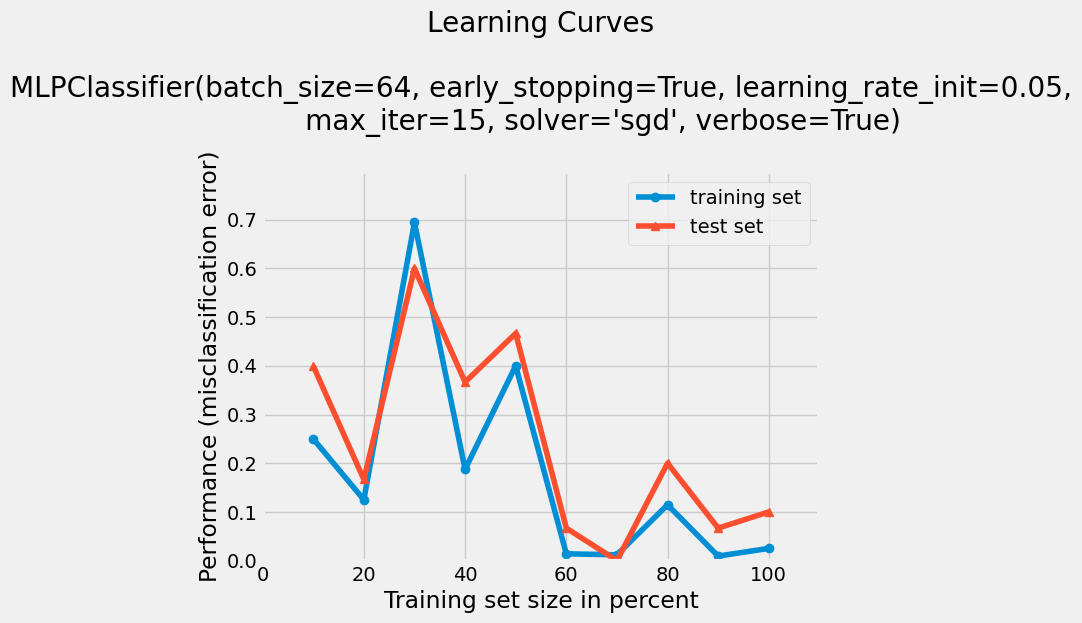

In [46]:

plot_learning_curves(X_train, y_train, X_test, y_test, model)
plt.show()

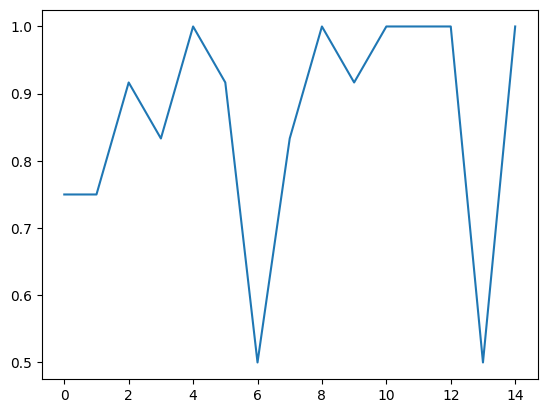

In [47]:
valid1=model.validation_scores_
plt.plot(valid1)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [49]:
# Calcul de la moyenne de l'erreur quadratique MSE:
mean_squared_error(y_test, y_pred1)

0.06666666666666667

In [50]:
!pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2 style="color:navy"> III. Etude comparative entre les différents classifieurs sur le même jeu de données: </h2>

<h3 style="color:maroon"> Explication: </h3>

En pratique, il existe plusieurs modèles permettant de classifier les objets. Parmi ces modèles on peut distinguer MLPCLassifier, SVM, l'arbre de décision, etc...
C'est ainsi que nous avons décidé de voir l'impact des différents modèles sur le même jeu de données.
Pour ce faire nous  avons créé une liste contenant les nom des classifieurs que nous allons utiliser. Par la suite nous suite nous avons fait un parcours de la liste tout en appliquant chaque élèment de cette liste sur le même jeu de données.
Ceci a été testé sur 3 datasets.

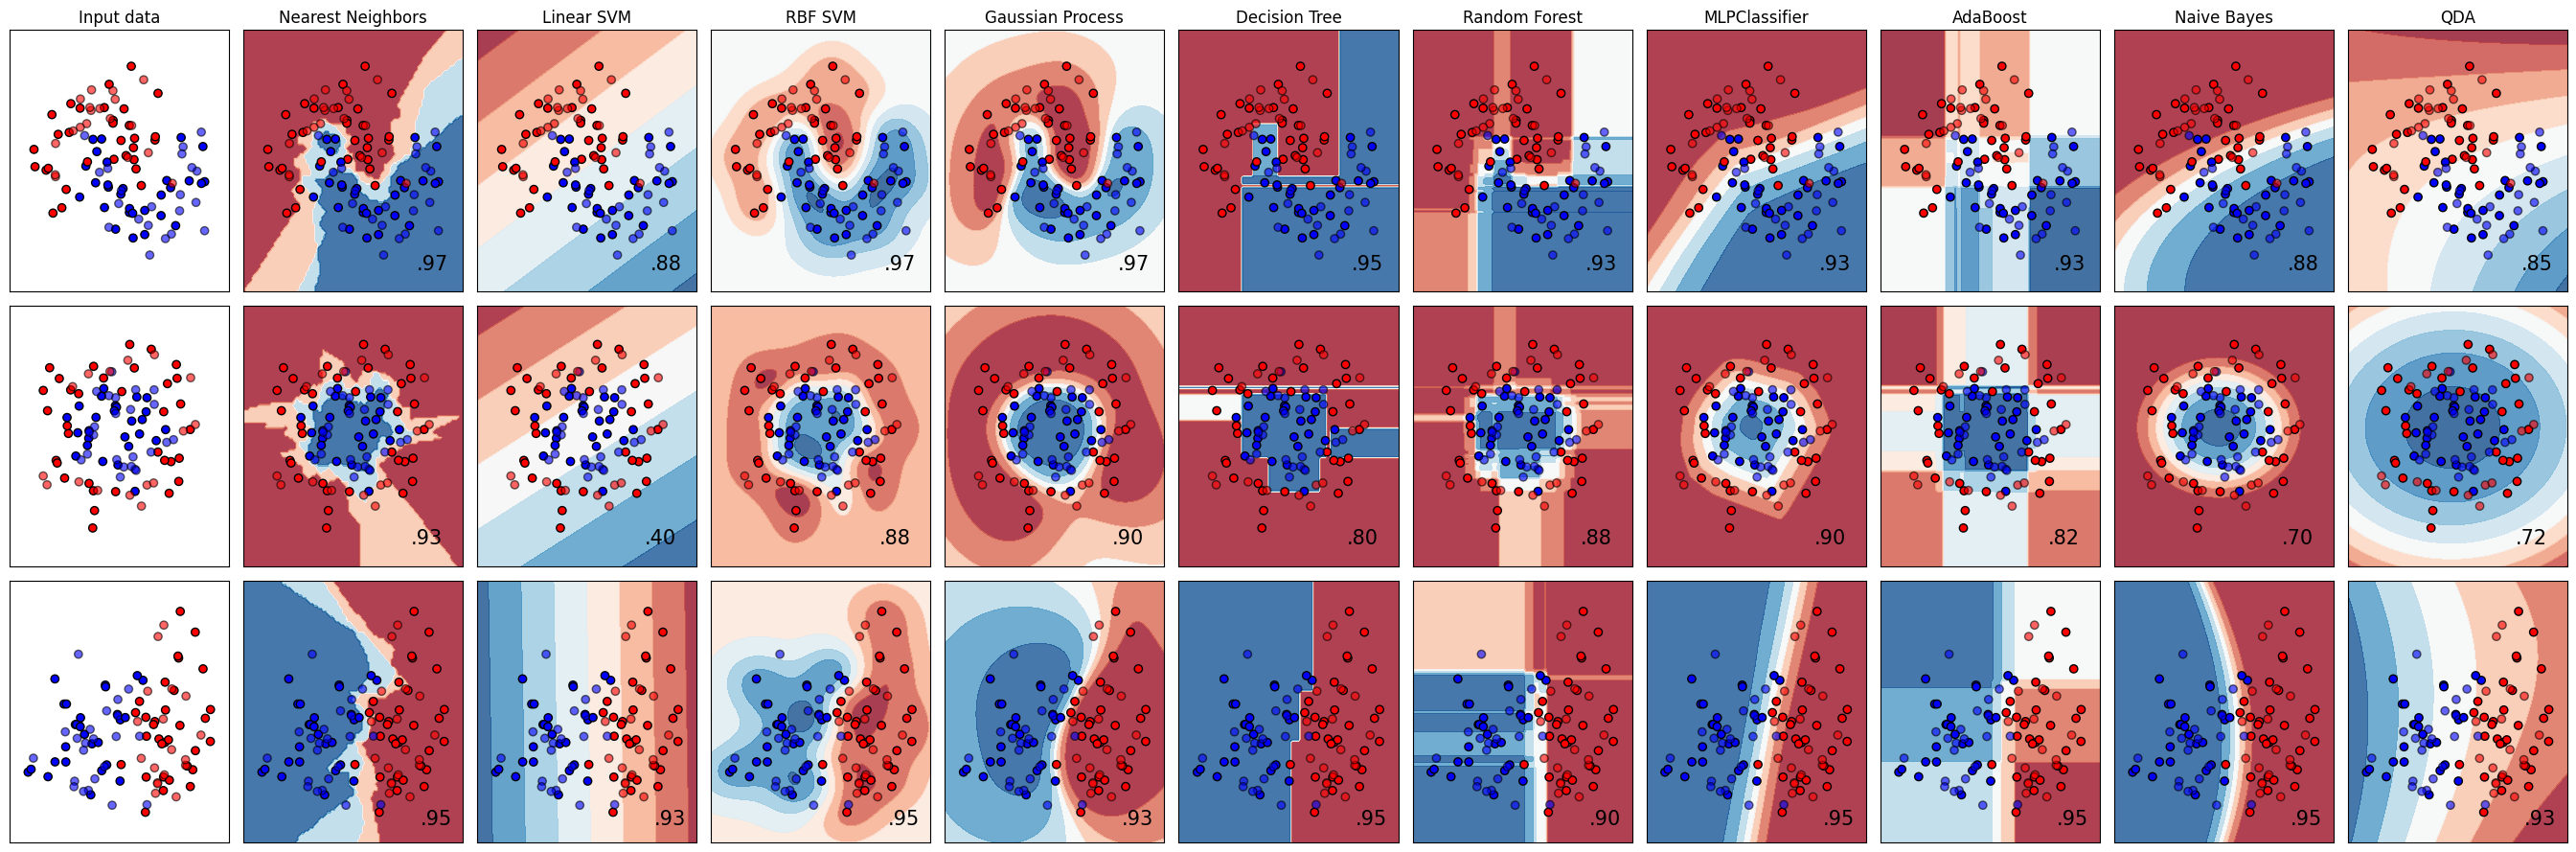

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "MLPClassifier",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

<h2 style='color:navy'>  IV. Etude comparative entre Iris et digits: </h2>

<h3 style='color:maroon'>  1. Explication: </h3>

Les objectifs de cette section sont:
<ul> 
    <li>Etudier le comportement du même modèle utilisé sur le même dataset tout en changeant à chaque fois les hyperparamètres </li>
    <li>Etudier le comportement du même modèle tout en l'appliquant sur différents dataset</li>
</ul>

<ol>
    <li> <b>Objectif 1:</b> </li>   
    <p> Pour ce faire nous créé une liste contenant l'ensemble des hypermètres à utiliser chaque fois sur le même dataset. De même nous avons crée une deuxème liste "Label" dans laquelle nous avons stocké les "labels" de chaque modèle. Ainsi, nous avons pu les appliquer sur le même jeu de données mais en changeant chaque fois les hyperparamètres </p><br> 
    <li><b>Objectif 2:</b> </li>
    <p> Pour ce faire nous avons crée une liste contenant les jeux de données dont on avait besoin. Ces jeux de données sont en fait iris et digits. après avoir créé cette liste nous avons  appliqué le même modèle avec lesles mêmes hyperparamètres sur les deux datasets</p>
    </ol>


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

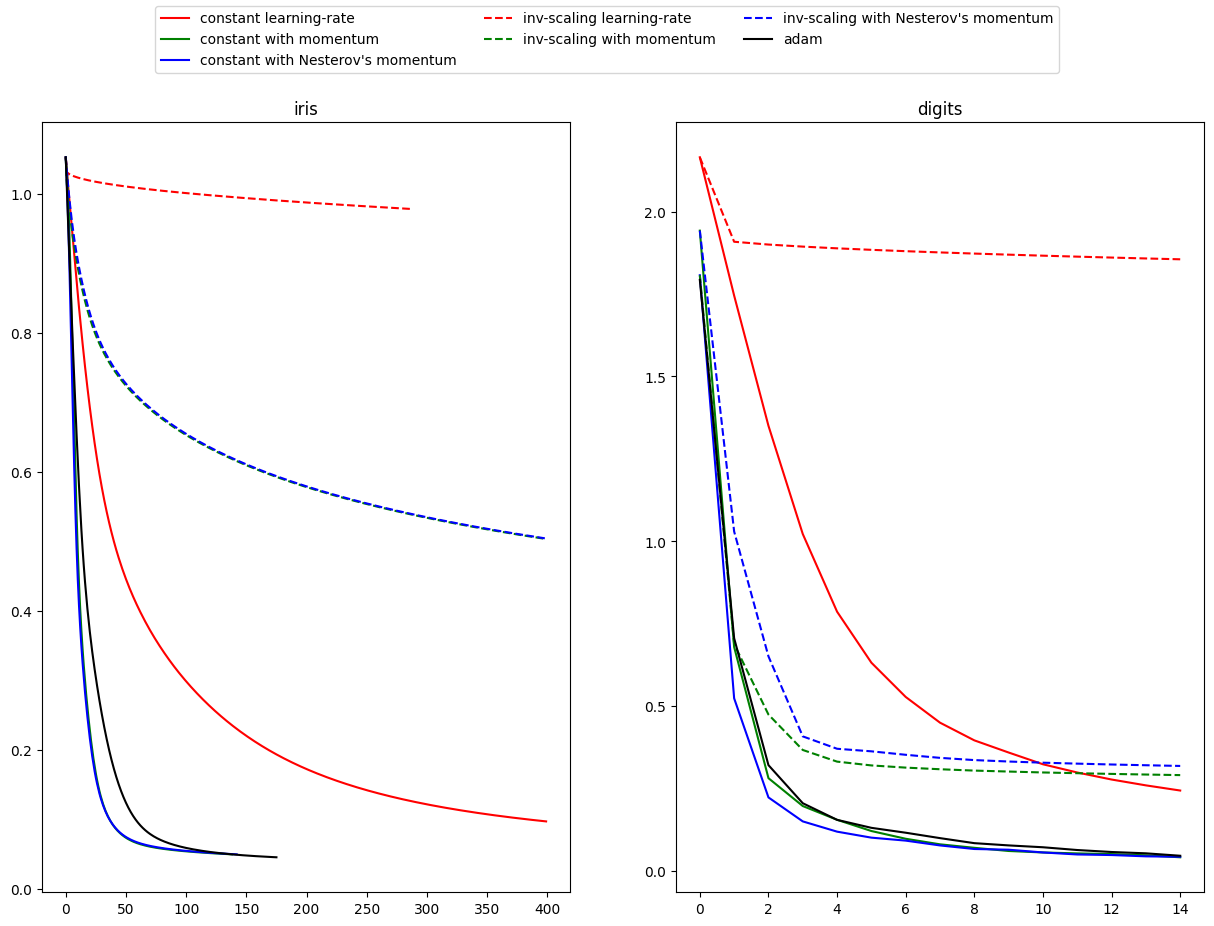

In [52]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits)
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

